  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
(395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ... 

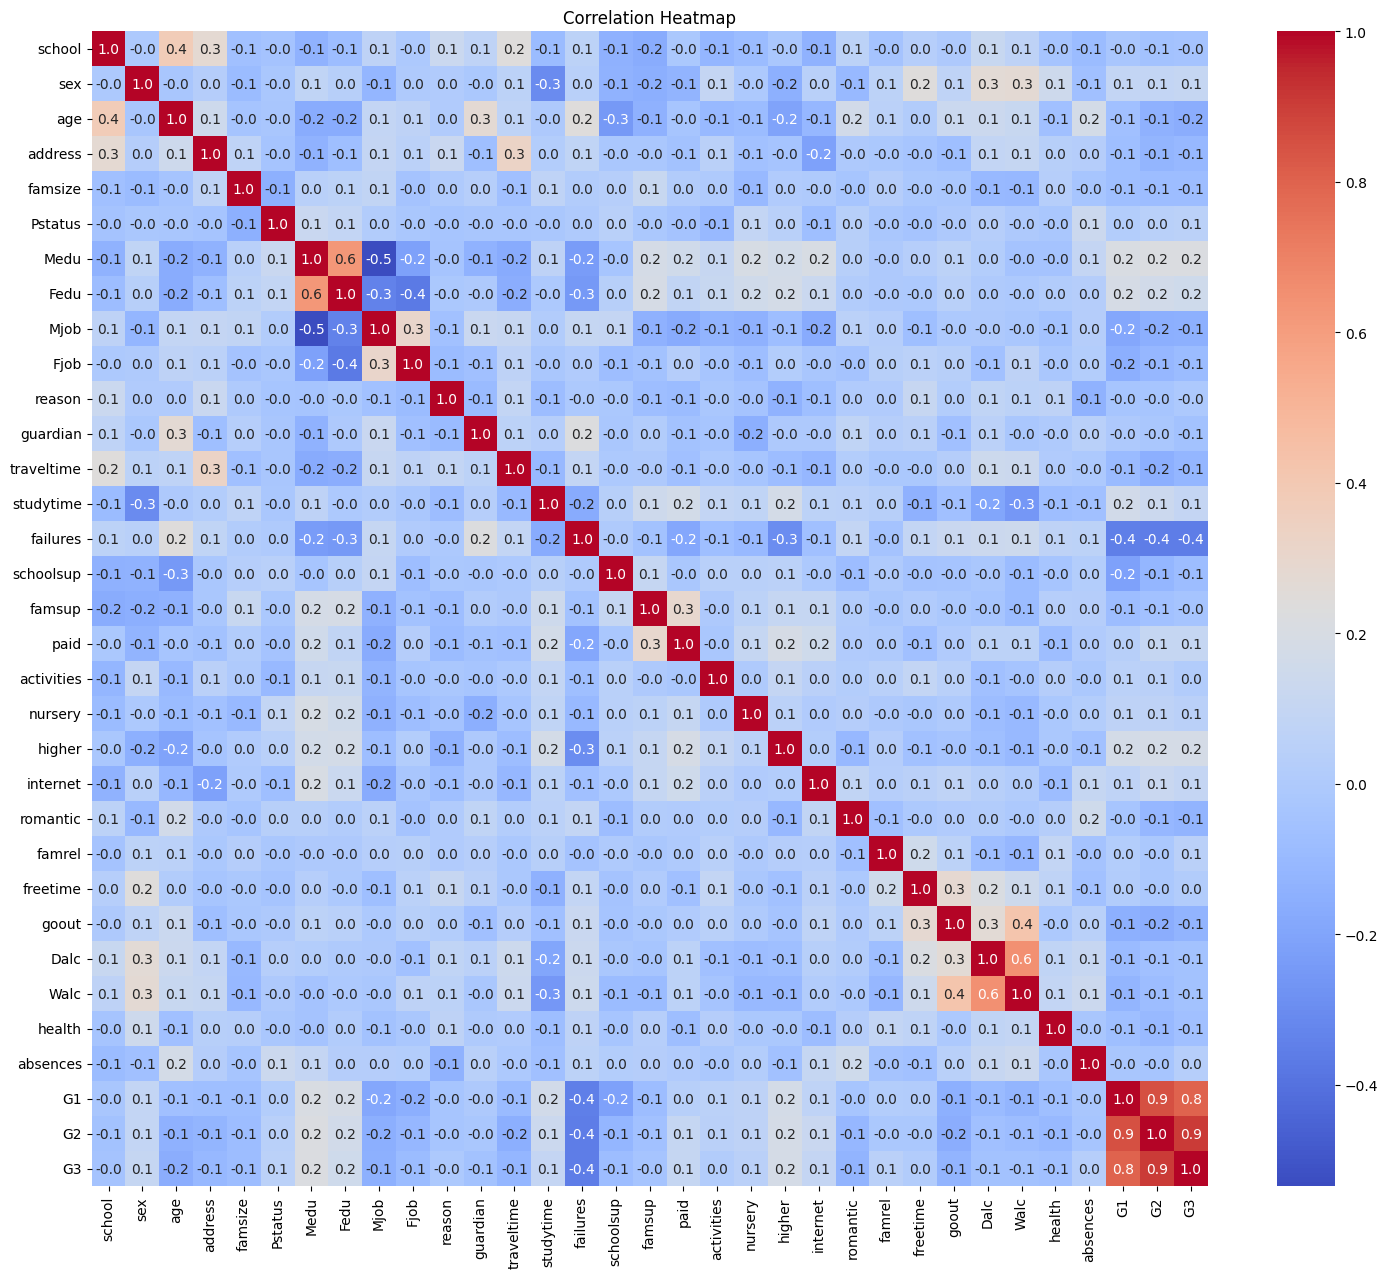

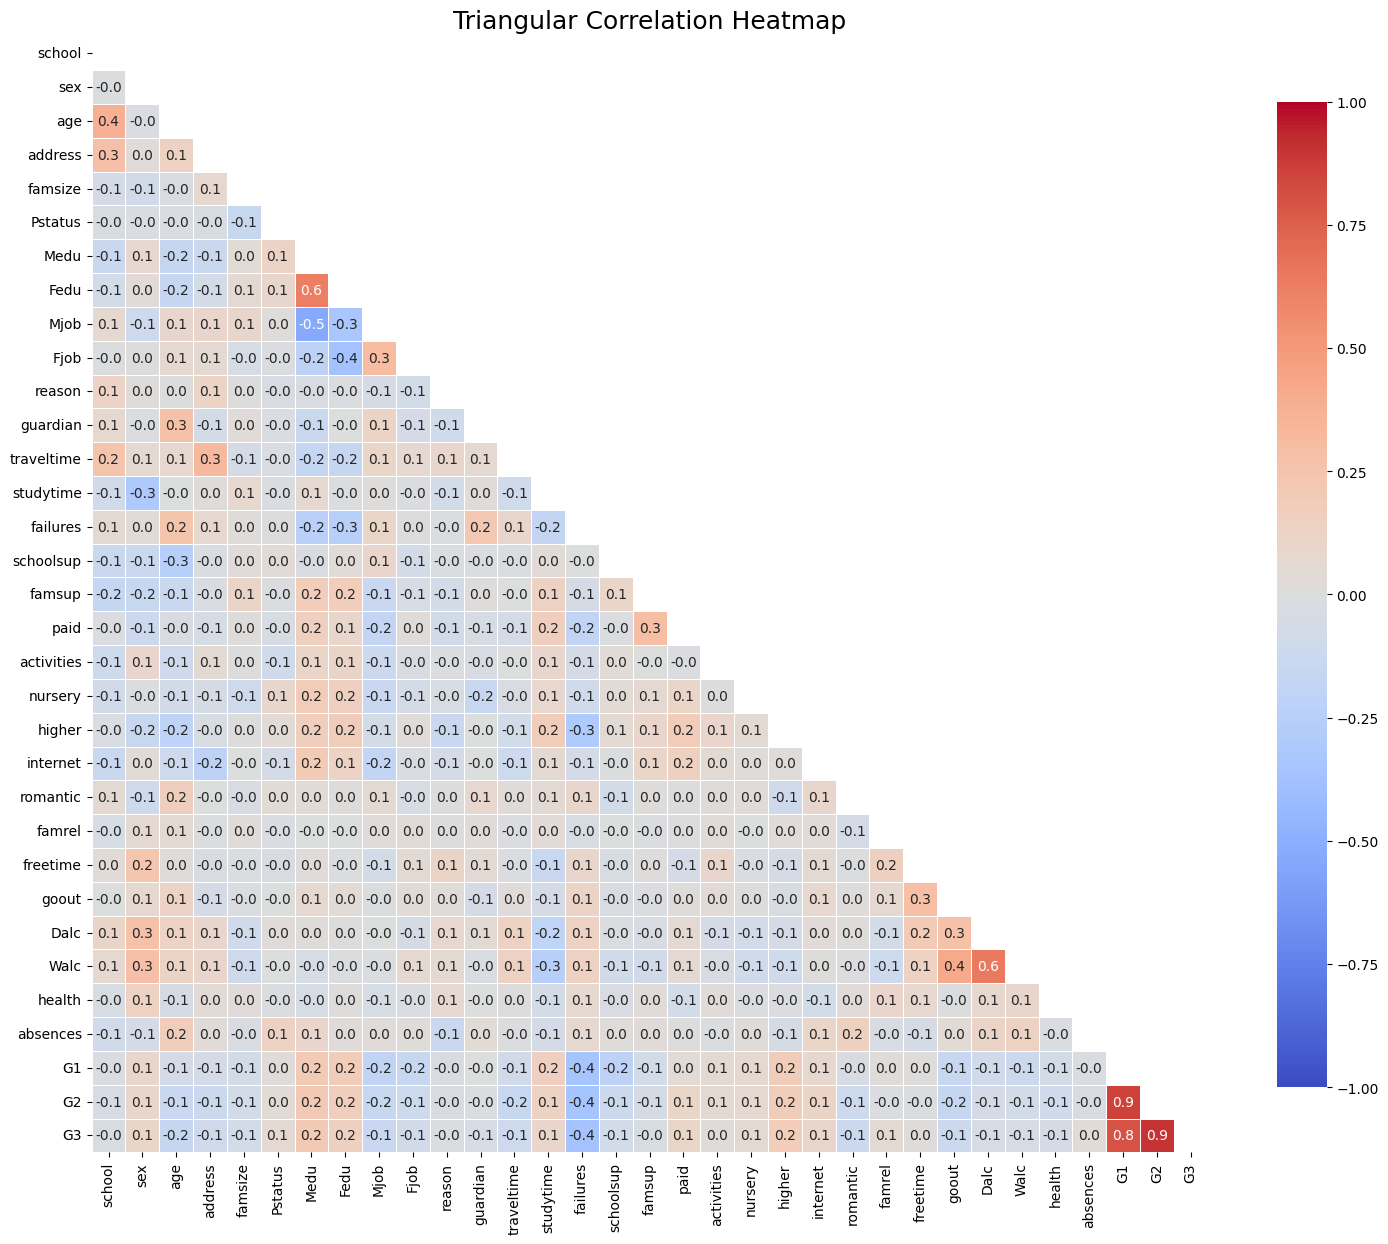

MAE: 1.2622306979018145
MSE: 4.2118674966017595
RMSE: 2.0522834834890036
R2: 0.7945936216805897


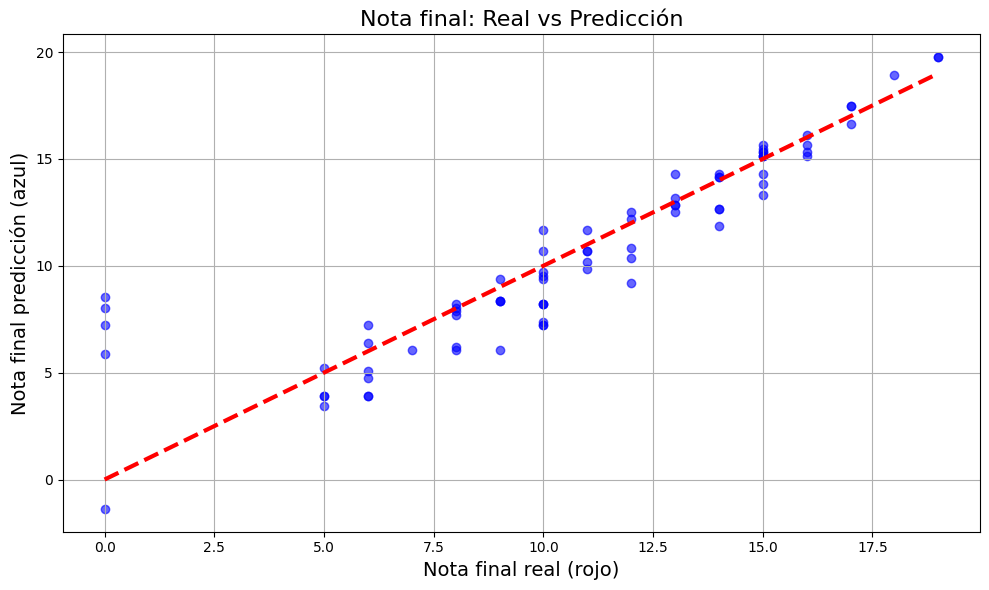

In [8]:
# 📥 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# 📥 2. LOAD THE DATA
# My url
url = 'https://raw.githubusercontent.com/Niglebar/Trabajo-final/main/student-mat.csv'
data = pd.read_csv(url, sep=";")

# Load the data
data = pd.read_csv(url, sep=";")


# 🕵️‍♂️ 3. DATA EXPLORATION
print(data.head()) # Check it works
print(data.shape)
print(data.head(5))
print(data.tail(5))
print(data.info())
print(data.describe())
print(data.columns)
print(data.dtypes)
print(data.isnull().sum()) # Check nulls


# 🔧 4. DATA CLEANING AND TRANSFORMATION
# Convert written to numbers
data['school'] = data['school'].map({'GP': 0, 'MS': 1})
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['address'] = data['address'].map({'U': 0, 'R': 1})
data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
data['Pstatus'] = data['Pstatus'].map({'T': 0, 'A': 1})
data['Mjob'] = data['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data['Fjob'] = data['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data['reason'] = data['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
data['guardian'] = data['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
data['schoolsup'] = data['schoolsup'].map({'no': 0, 'yes': 1})
data['famsup'] = data['famsup'].map({'no': 0, 'yes': 1})
data['paid'] = data['paid'].map({'no': 0, 'yes': 1})
data['activities'] = data['activities'].map({'no': 0, 'yes': 1})
data['nursery'] = data['nursery'].map({'no': 0, 'yes': 1})
data['higher'] = data['higher'].map({'no': 0, 'yes': 1})
data['internet'] = data['internet'].map({'no': 0, 'yes': 1})
data['romantic'] = data['romantic'].map({'no': 0, 'yes': 1})


# 🔢 5. SELECT ONLY NUMERIC DATA
numeric_data = data.select_dtypes(include=['int64', 'float64'])
print(numeric_data.head()) # Check it works


# 📊 6. VISUALIZATIONS - CORRELATION HEATMAP
plt.figure(figsize=(18,15))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 🔺 7. VISUALIZATIONS - TRIANGULAR HEATMAP
corr = numeric_data.corr() # correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) # mask to hide upper triangle
plt.figure(figsize=(18,16)) # matplotlib figure
sns.heatmap(corr,
            mask=mask,
            cmap='coolwarm',
            vmax=1.0, vmin=-1.0,
            center=0,
            annot=True,
            fmt=".1f",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Triangular Correlation Heatmap', fontsize=18)
plt.show() # actual heatmap


# 🎯 8. VISUALIZATIONS - SCATTER PLOTS
# Scatter plots: first and final
fig = px.scatter(data, x="G1", y="G3", color="G2", hover_data=['G3'],
                width=600, height=400, title = "Visualizing first and final grades of all students",
            labels={ # replaces default labels by column name
                "G1": "1st Grade",  "G3": "Final Grade"},
            template="simple_white")
fig.show()
# Scatter plots: second and final
fig = px.scatter(data, x="G2", y="G3", color="G2", hover_data=['G3'],
                width=600, height=400, title = "Visualizing second and final grades of all students",
            labels={ # replaces default labels by column name
                "G2": "2nd Grade",  "G3": "Final Grade"},
            template="simple_white")
fig.show()


# 🏋️‍♀️ 9. TRAINING THE LINEAR REGRESSION MODEL
# Select the features: what I´m using  (G1, G2 and G3) and what I want to predict (G3)
data = data[["G1", "G2", "G3"]]
predict = "G3"
X = np.array(data.drop(columns=[predict])) # features
y = np.array(data[predict]) # labels

# Divide between training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Make predictions
y_pred = lin_reg.predict(x_test)

# 📈 10. EVALUATE THE MODEL
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print(f"RMSE: {rmse}")
print("R2:", r2)

# 🖼️ 11. PLOT REAL VS PREDICTED GRADES
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # ideal line
plt.xlabel('Nota final real (rojo)', fontsize=14)
plt.ylabel('Nota final predicción (azul)', fontsize=14)
plt.title('Nota final: Real vs Predicción', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()



